<a href="https://colab.research.google.com/github/SusannaVipparthi/RAZT/blob/main/ROUT_4_2023_Pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOADING DATASET

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define file paths for the four attack scenarios
file_paths = [
    '/content/drive/MyDrive/blackhole.csv',
    '/content/drive/MyDrive/flooding.csv',
    '/content/drive/MyDrive/dodag.csv',
    '/content/drive/MyDrive/rank.csv'
]

In [ ]:
# Load all CSV files into a list of DataFrames
dfs = [pd.read_csv(file) for file in file_paths]

In [ ]:
# Concatenate all DataFrames into a single DataFrame
data = pd.concat(dfs, ignore_index=True)

In [ ]:
# Display the first few rows
print("Dataset Preview:")
print(data.head())

Dataset Preview:
    time  source  destination  length  info  transmission_rate_per_1000_ms  \
0  0.037      39         9999     0.0   1.0                       0.000000   
1  0.037      39         9999     0.0   1.0                       0.000000   
2  0.038      39         9999     0.0   1.0                       0.671176   
3  0.045      39         9999     0.0   1.0                       0.000000   
4  0.046      39         9999     0.0   1.0                       0.000000   

   reception_rate_per_1000_ms  transmission_average_per_sec  \
0                    0.671176                      0.000000   
1                    0.649873                      0.000000   
2                    0.652361                      0.462516   
3                    0.633786                      0.000000   
4                    0.630378                      0.000000   

   reception_average_per_sec  transmission_count_per_sec  \
0                   0.499879                    0.000000   
1              

In [ ]:
# Basic dataset information
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639975 entries, 0 to 1639974
Data columns (total 18 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   time                                 1639975 non-null  float64
 1   source                               1639975 non-null  int64  
 2   destination                          1639975 non-null  int64  
 3   length                               1639975 non-null  float64
 4   info                                 1639975 non-null  float64
 5   transmission_rate_per_1000_ms        1639975 non-null  float64
 6   reception_rate_per_1000_ms           1639975 non-null  float64
 7   transmission_average_per_sec         1639975 non-null  float64
 8   reception_average_per_sec            1639975 non-null  float64
 9   transmission_count_per_sec           1639975 non-null  float64
 10  reception_count_per_sec              1639975 non-nu

HANDLING MISSING VALUES

In [ ]:
# Check for missing values
print("\nMissing Values (Before Handling):")
print(data.isnull().sum())


Missing Values (Before Handling):
time                                   0
source                                 0
destination                            0
length                                 0
info                                   0
transmission_rate_per_1000_ms          0
reception_rate_per_1000_ms             0
transmission_average_per_sec           0
reception_average_per_sec              0
transmission_count_per_sec             0
reception_count_per_sec                0
transmission_total_duration_per_sec    0
reception_total_duration_per_sec       0
dao                                    0
dis                                    0
dio                                    0
category                               0
label                                  0
dtype: int64


NORMALIZATION

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize numerical columns using Min-Max Scaler
scaler = MinMaxScaler()
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [ ]:
# Display the normalized data
print("\nNormalized Data (Preview):")
print(data.head())


Normalized Data (Preview):
       time  source  destination  length  info  transmission_rate_per_1000_ms  \
0  0.000008    0.38          1.0     0.0   1.0                       0.000000   
1  0.000008    0.38          1.0     0.0   1.0                       0.000000   
2  0.000008    0.38          1.0     0.0   1.0                       0.671176   
3  0.000009    0.38          1.0     0.0   1.0                       0.000000   
4  0.000010    0.38          1.0     0.0   1.0                       0.000000   

   reception_rate_per_1000_ms  transmission_average_per_sec  \
0                    0.671176                      0.000000   
1                    0.649873                      0.000000   
2                    0.652361                      0.462516   
3                    0.633786                      0.000000   
4                    0.630378                      0.000000   

   reception_average_per_sec  transmission_count_per_sec  \
0                   0.499879                  

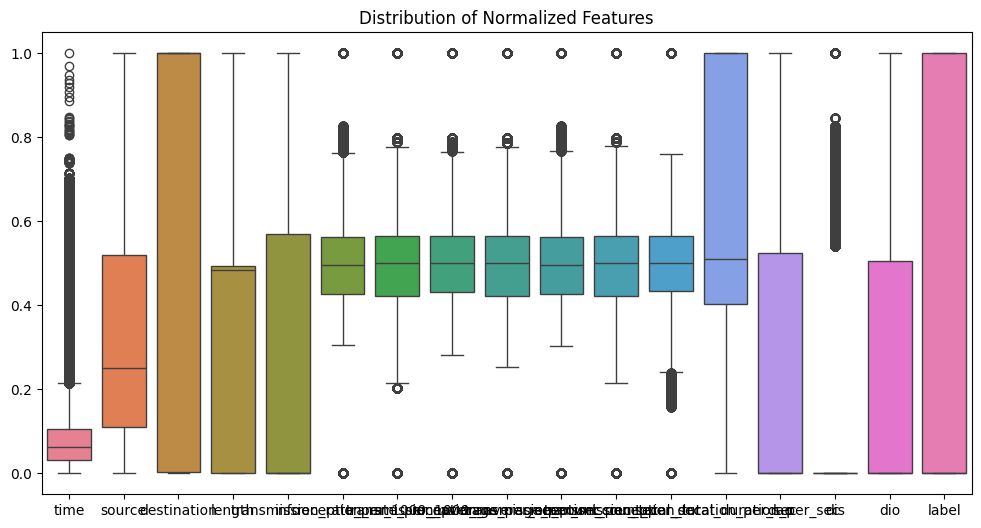

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the normalized distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numeric_columns])
plt.title("Distribution of Normalized Features")
plt.show()

In [ ]:
# Separate features and target
X = data.drop(columns=['label'])  # Assuming 'LABEL' is the target
y = data['label']

ONE-HOT ENCODING

In [ ]:
# Identify columns with 'object' dtype (likely containing strings)
categorical_cols = X.select_dtypes(include=['object']).columns

In [ ]:
# Import OneHotEncoder for categorical feature encoding
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Create and apply OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for compatibility with mutual_info_classif
encoded_data = encoder.fit_transform(X[categorical_cols])

In [ ]:
# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

In [ ]:
# Drop original categorical columns and concatenate encoded columns
X = X.drop(columns=categorical_cols)
X = pd.concat([X, encoded_df], axis=1)

FEATURE SELECTION USING MUTUAL INFORMATION

In [ ]:
# Now you can calculate Mutual Information scores
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI_Score': mi_scores}).sort_values(by='MI_Score', ascending=False)

In [ ]:
# Display top features
print("\nTop Features Based on Mutual Information:")
print(mi_df.head(10))


Top Features Based on Mutual Information:
                                Feature  MI_Score
19                      category_Normal  0.837547
11  transmission_total_duration_per_sec  0.481790
12     reception_total_duration_per_sec  0.404059
8             reception_average_per_sec  0.286050
7          transmission_average_per_sec  0.285987
10              reception_count_per_sec  0.281886
5         transmission_rate_per_1000_ms  0.280265
9            transmission_count_per_sec  0.274049
6            reception_rate_per_1000_ms  0.272937
2                           destination  0.222679


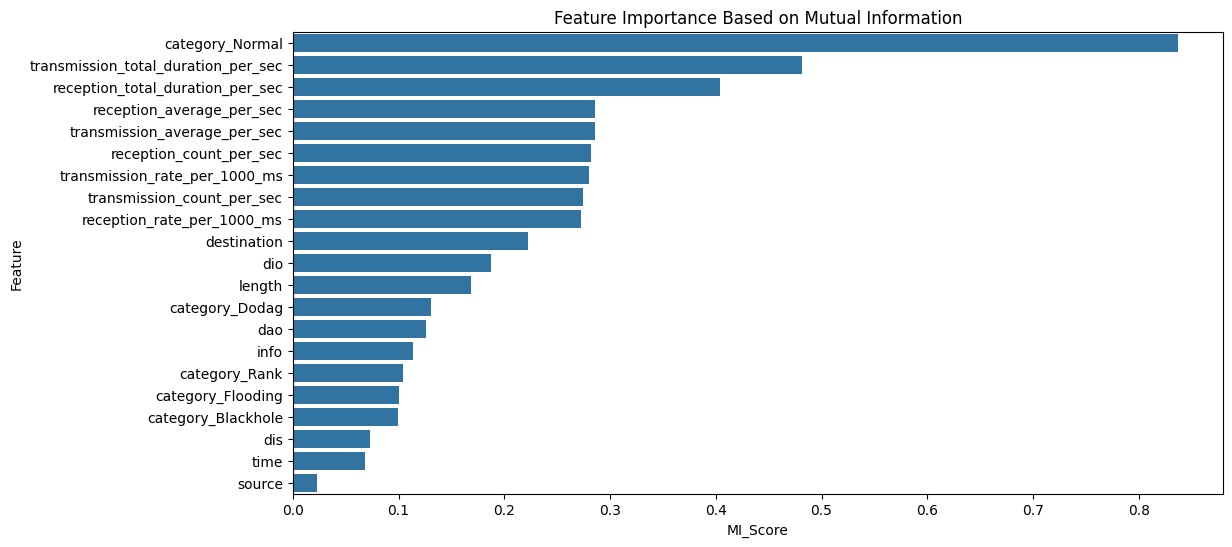

In [ ]:
# Visualize MI scores
plt.figure(figsize=(12, 6))
sns.barplot(x='MI_Score', y='Feature', data=mi_df)
plt.title("Feature Importance Based on Mutual Information")
plt.show()

FEATURE ENGINEERING-TRUST METRICS

In [ ]:
# Example: Creating trust-based features
data['Behavior_Metric'] = (data['transmission_rate_per_1000_ms'] + data['reception_rate_per_1000_ms'] - data['transmission_average_per_sec']) / 3  # Example metric
data['Packet_Timing'] = data['time'] * data['length']  # Example metric

In [ ]:
# Display the updated dataset
print("\nDataset with Engineered Features (Preview):")
print(data.head())


Dataset with Engineered Features (Preview):
       time  source  destination  length  info  transmission_rate_per_1000_ms  \
0  0.000008    0.38          1.0     0.0   1.0                       0.000000   
1  0.000008    0.38          1.0     0.0   1.0                       0.000000   
2  0.000008    0.38          1.0     0.0   1.0                       0.671176   
3  0.000009    0.38          1.0     0.0   1.0                       0.000000   
4  0.000010    0.38          1.0     0.0   1.0                       0.000000   

   reception_rate_per_1000_ms  transmission_average_per_sec  \
0                    0.671176                      0.000000   
1                    0.649873                      0.000000   
2                    0.652361                      0.462516   
3                    0.633786                      0.000000   
4                    0.630378                      0.000000   

   reception_average_per_sec  transmission_count_per_sec  \
0                   0.499879 

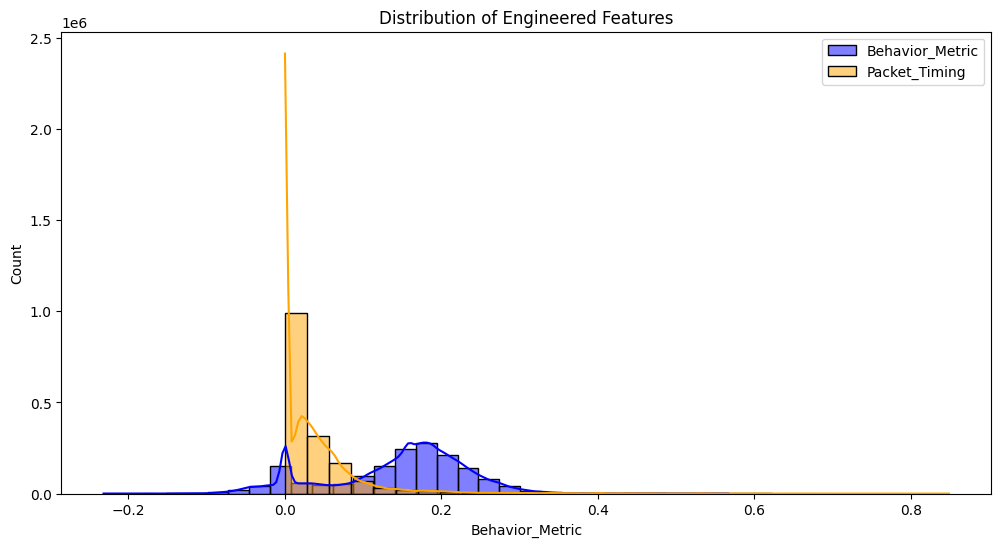

In [ ]:
# Visualize the distribution of new features
plt.figure(figsize=(12, 6))
sns.histplot(data['Behavior_Metric'], kde=True, bins=30, color='blue', label='Behavior_Metric')
sns.histplot(data['Packet_Timing'], kde=True, bins=30, color='orange', label='Packet_Timing')
plt.legend()
plt.title("Distribution of Engineered Features")
plt.show()

SPLITTING DATASET INTO TRAINING AND TESTING

In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into training and testing sets (80/20 split)
X = data.drop(columns=['label'])
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Print the shape of the splits
print("\nDataset Split:")
print(f"Training Set: {X_train.shape[0]} rows, {X_train.shape[1]} features")
print(f"Testing Set: {X_test.shape[0]} rows, {X_test.shape[1]} features")


Dataset Split:
Training Set: 1311980 rows, 19 features
Testing Set: 327995 rows, 19 features


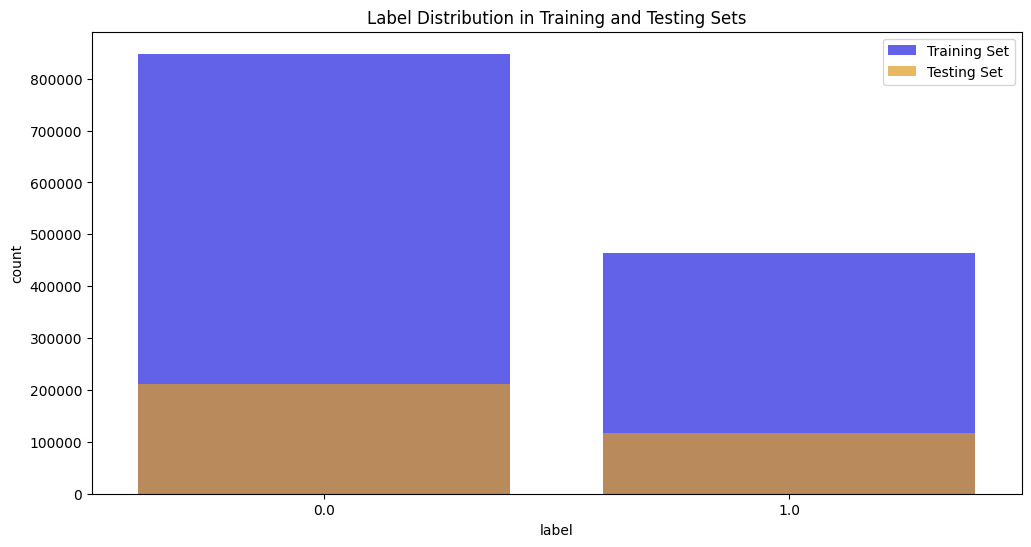

In [ ]:
# Visualize the distribution of target labels in the splits
plt.figure(figsize=(12, 6))
sns.countplot(x=y_train, label="Training Set", color='blue', alpha=0.7)
sns.countplot(x=y_test, label="Testing Set", color='orange', alpha=0.7)
plt.legend()
plt.title("Label Distribution in Training and Testing Sets")
plt.show()

SAVING AND DOWNLOADING PREPROCESSED DATASET

In [ ]:
data.to_csv('preprocessed_data.csv', index=False)

In [ ]:
from google.colab import files

files.download('preprocessed_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DEFINING THE ENVIRONMENT FOR RL

In [ ]:
# Define states, actions, and rewards
states = ["Low Trust", "Medium Trust", "High Trust"]
actions = ["Increase Trust", "Decrease Trust", "Isolate Node", "Allow Communication"]

In [ ]:
# Initialize Q-table
q_table = pd.DataFrame(0, index=states, columns=actions)

In [ ]:
# Define reward function
rewards = {
    ("Low Trust", "Increase Trust"): -1,
    ("Low Trust", "Decrease Trust"): -1,
    ("Low Trust", "Isolate Node"): +1,
    ("Low Trust", "Allow Communication"): -1,
    ("Medium Trust", "Increase Trust"): +1,
    ("Medium Trust", "Decrease Trust"): -1,
    ("Medium Trust", "Isolate Node"): 0,
    ("Medium Trust", "Allow Communication"): +1,
    ("High Trust", "Increase Trust"): +1,
    ("High Trust", "Decrease Trust"): -1,
    ("High Trust", "Isolate Node"): -1,
    ("High Trust", "Allow Communication"): +1,
}

Implementing the Q-Learning Algorithm

In [ ]:
# Parameters for Q-Learning
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 1.0  # Initial exploration rate
epsilon_decay = 0.99
min_epsilon = 0.01
episodes = 1000

In [ ]:
# Function to choose action based on epsilon-greedy policy
def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.choice(actions)
    else:
        return q_table.loc[state].idxmax()

In [ ]:
import numpy as np

# Q-Learning algorithm
for episode in range(episodes):
    # Randomly initialize a state
    state = np.random.choice(states)

    for step in range(10):  # Limit steps per episode
        # Choose an action
        action = choose_action(state)

        # Get reward for the state-action pair
        reward = rewards.get((state, action), 0)

        # Simulate the next state (simplified here for demo purposes)
        next_state = np.random.choice(states)

        # Update Q-value
        q_table.loc[state, action] += alpha * (reward + gamma * q_table.loc[next_state].max() - q_table.loc[state, action])

        # Transition to the next state
        state = next_state

    # Decay epsilon
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

<ipython-input-42-176c5f17b471>:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  q_table.loc[state, action] += alpha * (reward + gamma * q_table.loc[next_state].max() - q_table.loc[state, action])
<ipython-input-42-176c5f17b471>:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  q_table.loc[state, action] += alpha * (reward + gamma * q_table.loc[next_state].max() - q_table.loc[state, action])
<ipython-input-42-176c5f17b471>:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.1' has dtype incompatible with int64, please explicitly cast to a compatible dty

Visualize the Q-Table

Optimized Q-Table:
              Increase Trust  Decrease Trust  Isolate Node  \
Low Trust           7.790128        7.879407     10.000000   
Medium Trust        9.647315        7.753755      8.863152   
High Trust          9.679577        7.867941      7.644026   

              Allow Communication  
Low Trust                7.926491  
Medium Trust            10.000000  
High Trust              10.000000  


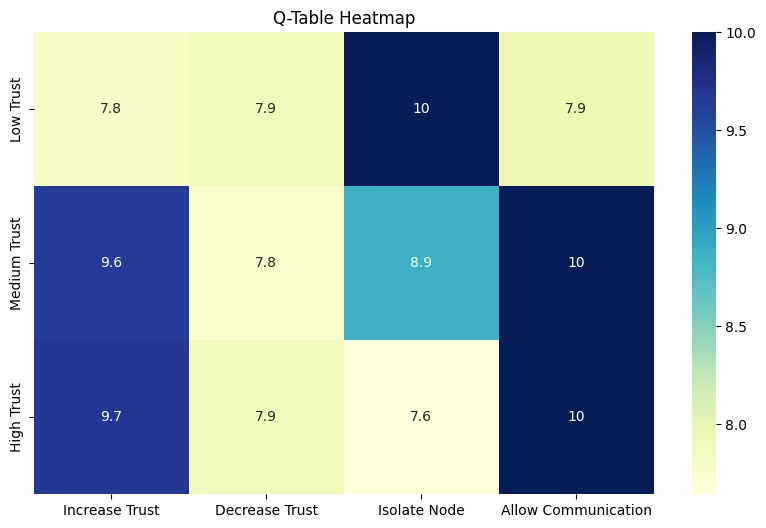

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the Q-table
print("Optimized Q-Table:")
print(q_table)

# Visualize Q-values
plt.figure(figsize=(10, 6))
sns.heatmap(q_table, annot=True, cmap="YlGnBu")
plt.title("Q-Table Heatmap")
plt.show()

Apply the RL Optimized Trust Scores

In [ ]:
# Simulated trust score adjustments
trust_scores = {"Node1": 0.4, "Node2": 0.7, "Node3": 0.9, "Node4": 0.2}
adjusted_scores = {}

for node, trust in trust_scores.items():
    # Determine initial state
    if trust < 0.5:
        state = "Low Trust"
    elif trust < 0.8:
        state = "Medium Trust"
    else:
        state = "High Trust"

    # Choose action based on optimized Q-table
    action = q_table.loc[state].idxmax()

    # Update trust score based on action
    if action == "Increase Trust":
        adjusted_scores[node] = min(1.0, trust + 0.1)
    elif action == "Decrease Trust":
        adjusted_scores[node] = max(0.0, trust - 0.1)
    elif action == "Isolate Node":
        adjusted_scores[node] = 0.0
    else:  # Allow Communication
        adjusted_scores[node] = trust

# Display original and adjusted trust scores
print("Original Trust Scores:", trust_scores)
print("Adjusted Trust Scores:", adjusted_scores)

Original Trust Scores: {'Node1': 0.4, 'Node2': 0.7, 'Node3': 0.9, 'Node4': 0.2}
Adjusted Trust Scores: {'Node1': 0.5, 'Node2': 0.7999999999999999, 'Node3': 1.0, 'Node4': 0.30000000000000004}


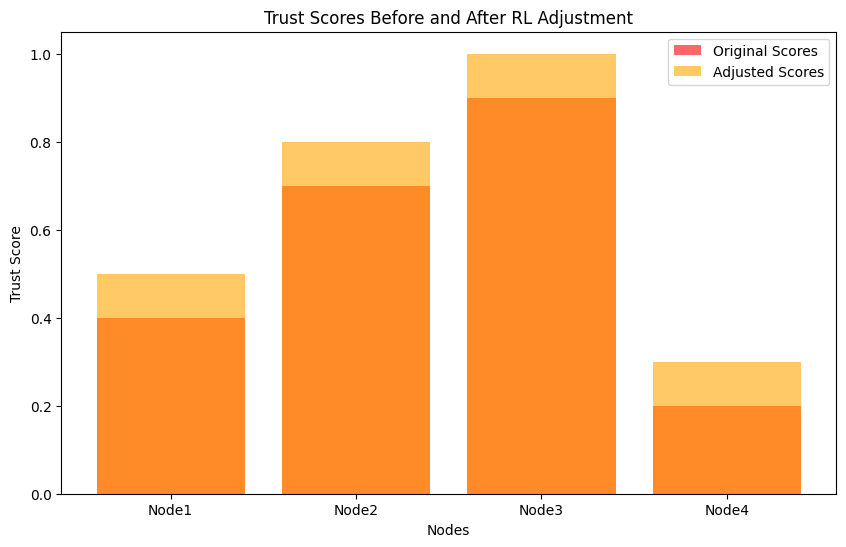

In [ ]:
# Visualize trust scores
original_scores = list(trust_scores.values())
adjusted_scores_values = list(adjusted_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(trust_scores.keys(), original_scores, alpha=0.6, label="Original Scores", color="red")
plt.bar(adjusted_scores.keys(), adjusted_scores_values, alpha=0.6, label="Adjusted Scores", color="orange")
plt.xlabel("Nodes")
plt.ylabel("Trust Score")
plt.title("Trust Scores Before and After RL Adjustment")
plt.legend()
plt.show()